In [102]:
%reload_ext autoreload
%autoreload 2

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from asa.dataset import Dataset

In [12]:
x = np.random.normal(size=1000)
y = x**2 + np.random.normal(size=1000)
z = np.log(np.abs(x + y)) + np.random.normal(size=1000)

In [13]:
data = np.array([x, y, z]).T

In [14]:
dataset = Dataset(data, ['x', 'y', 'z'], ['x', 'y', 'z'])

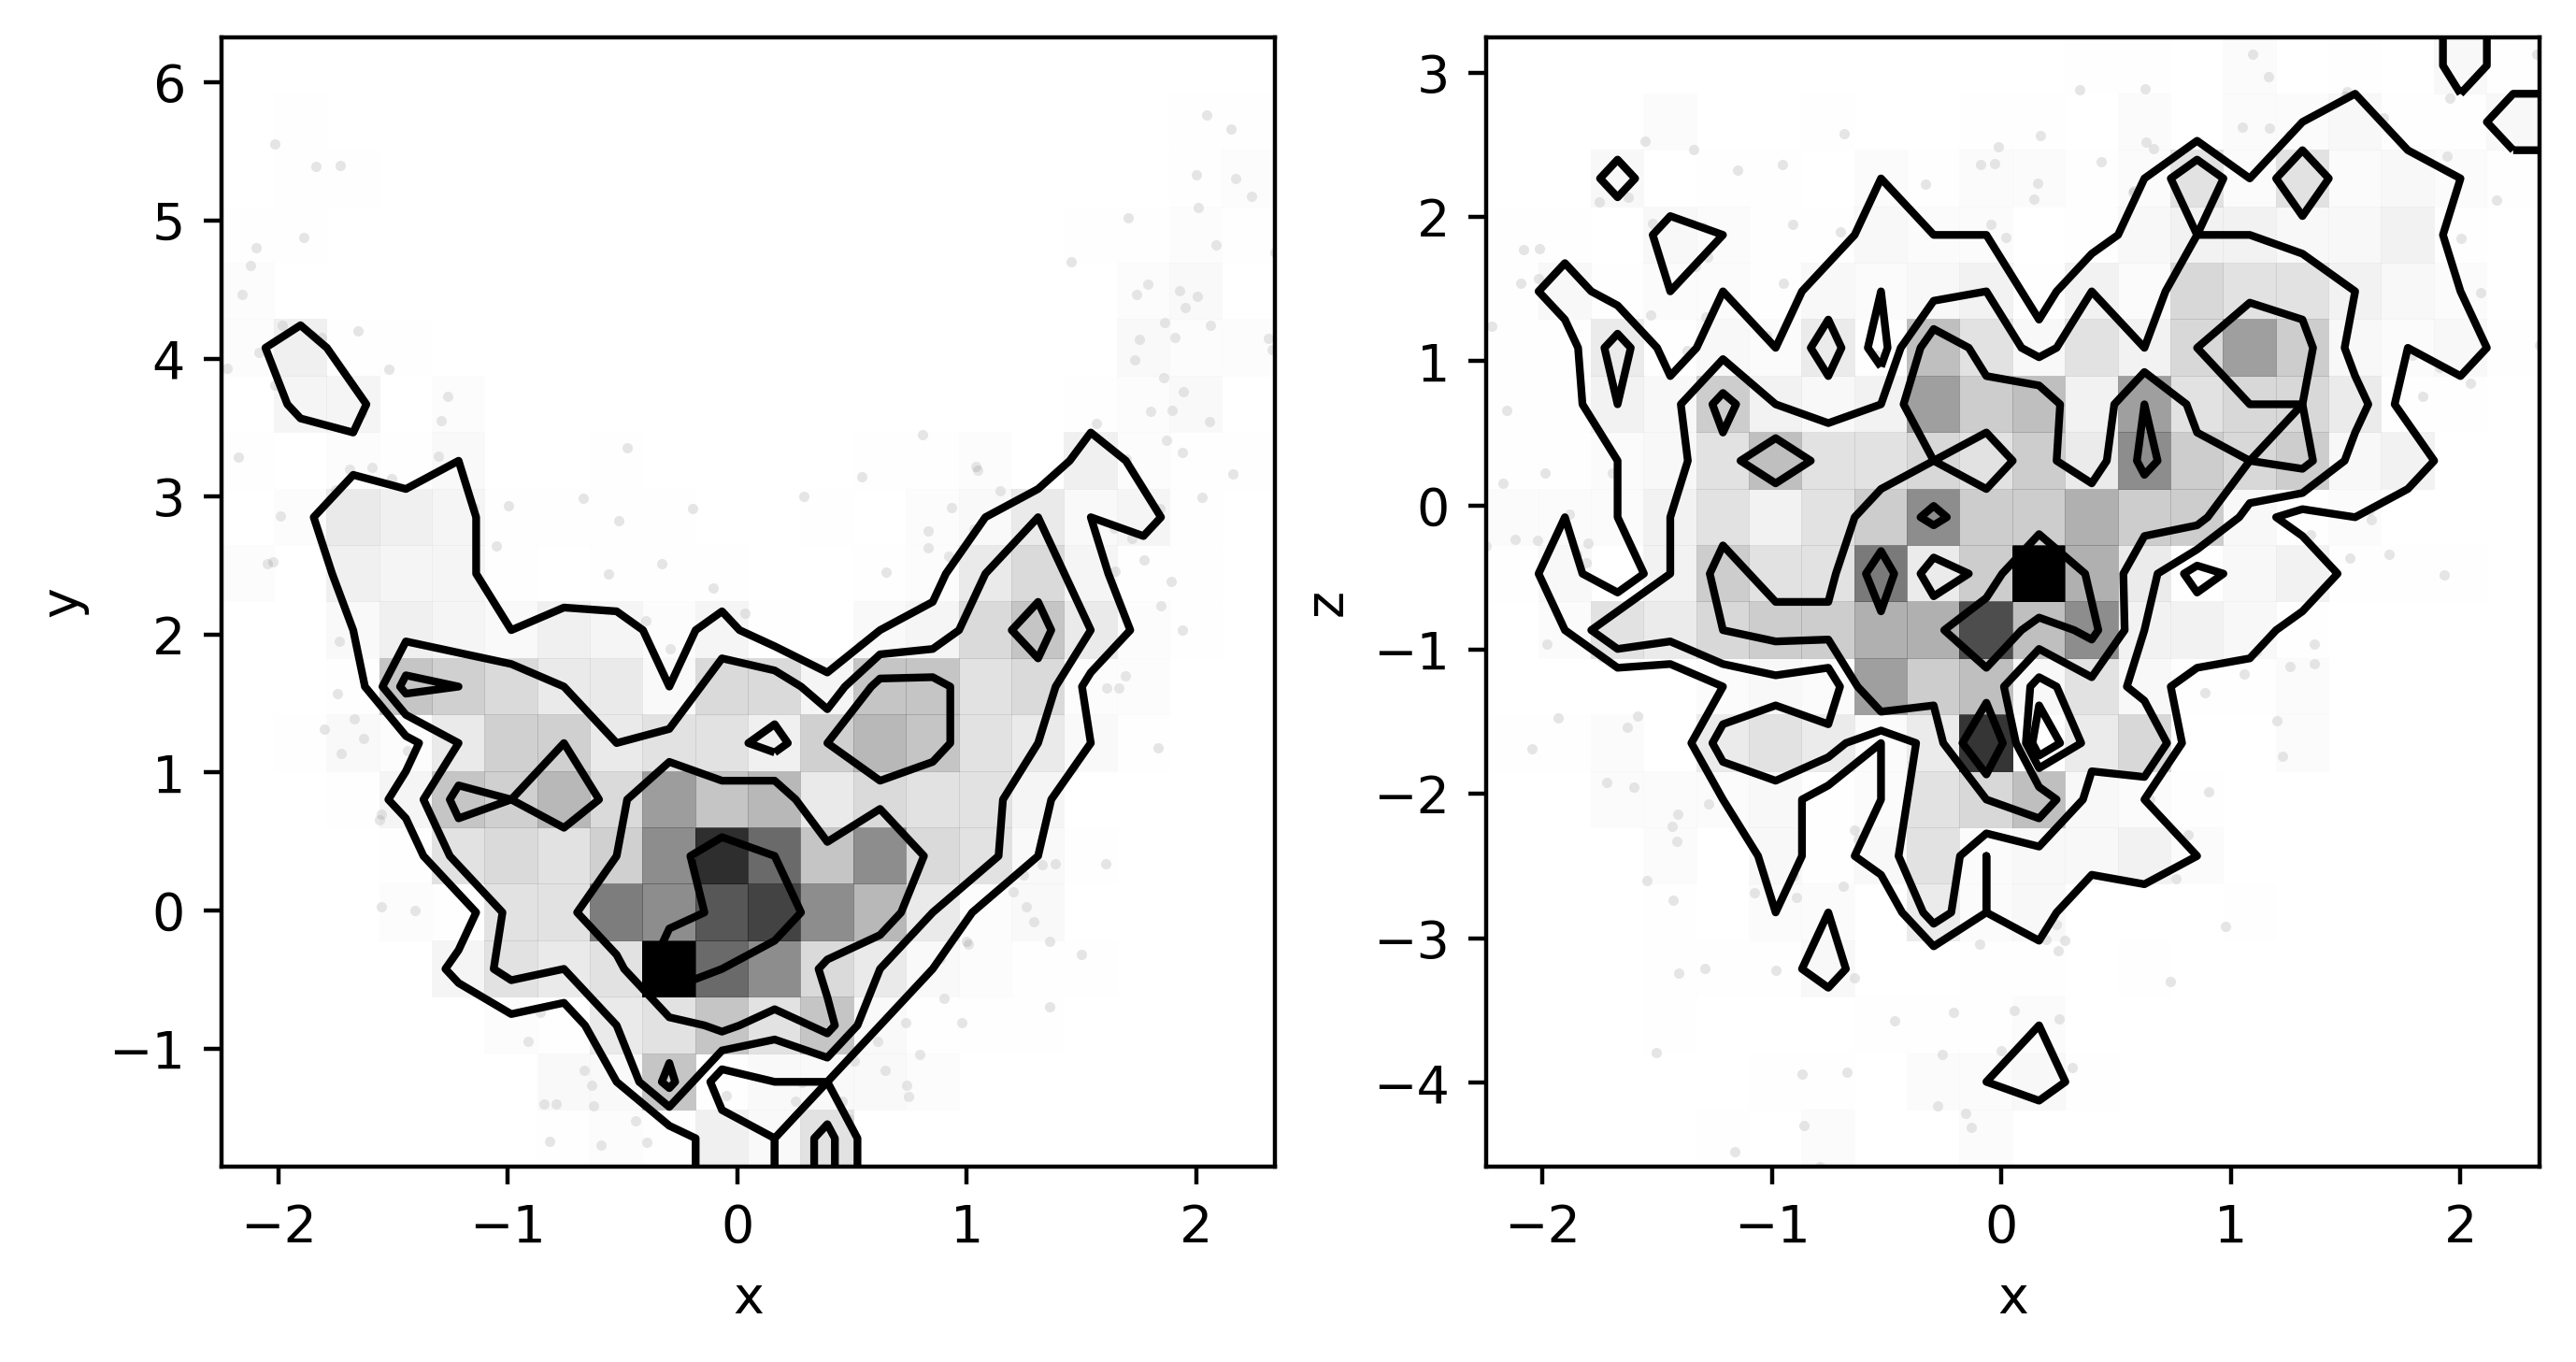

In [15]:
dataset.contour('x', ['y', 'z'], subplots_kwargs={'figshape': (1, 2)})

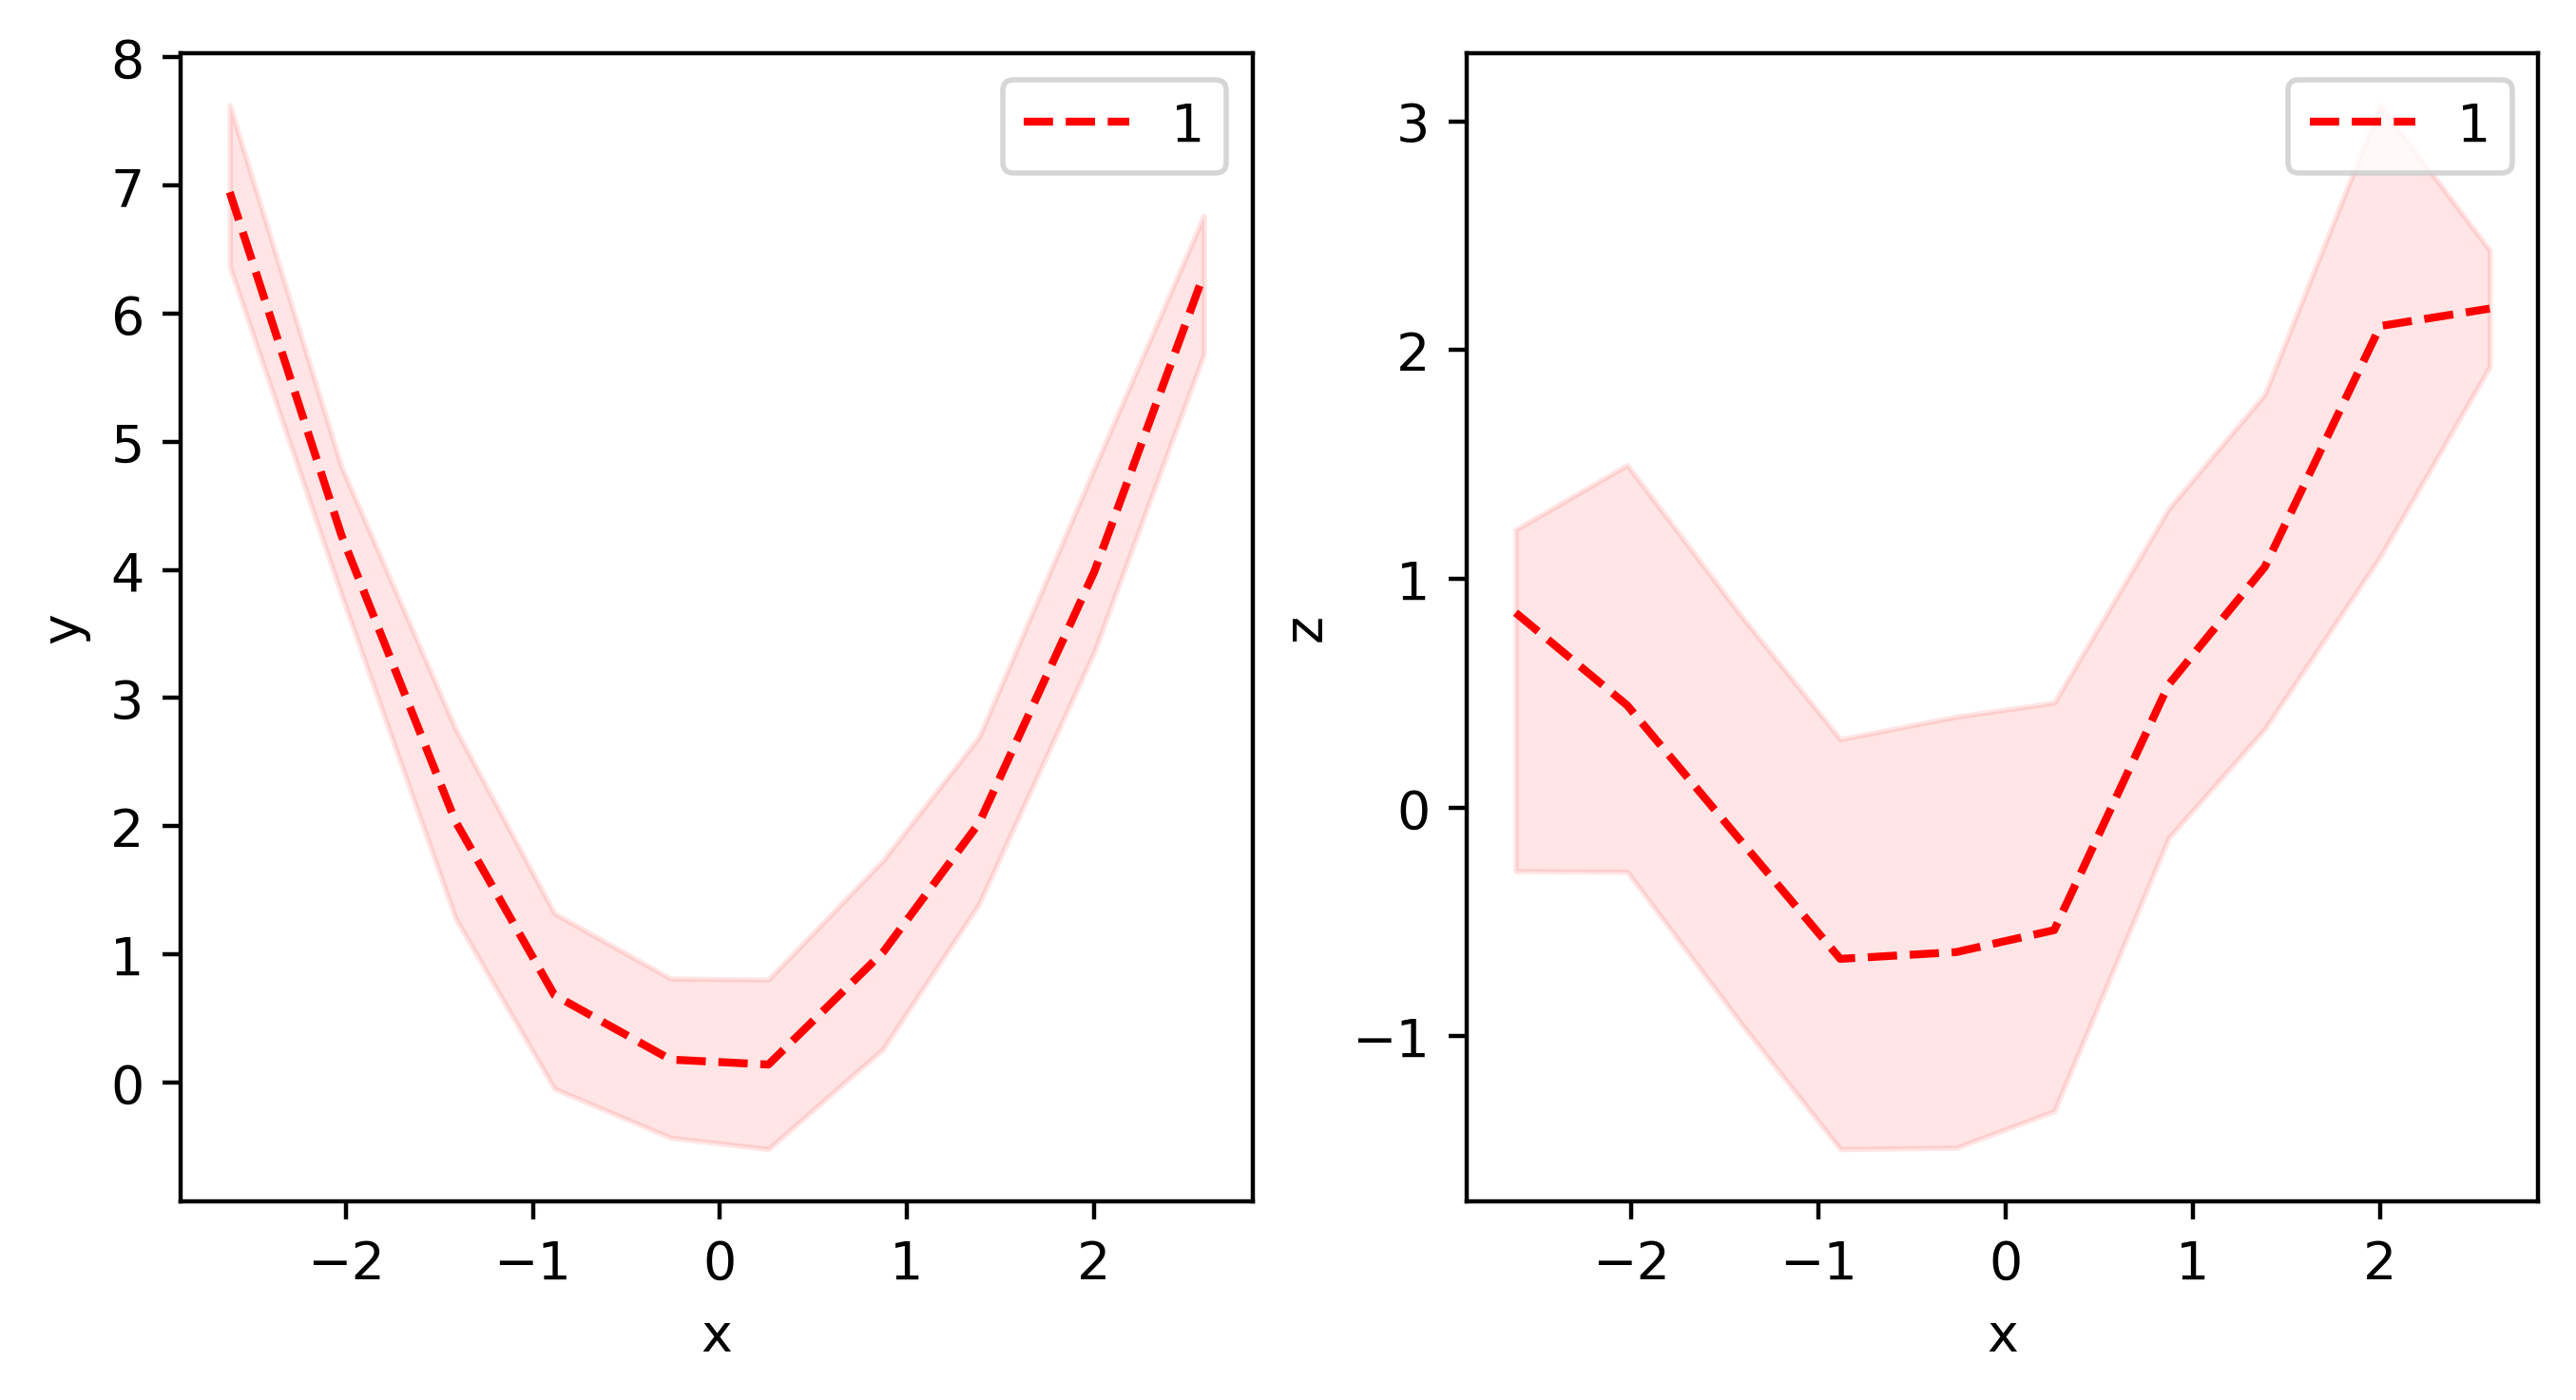

In [41]:
dataset.trend('x', ['y', 'z'], ranges=([[-3,3],[-10,10]]), subplots_kwargs={'figshape': (1, 2)},
    bins=10,ytype='mean',plot_kwargs={"color":"r","ls":"--","label":"1"},\
    scatter_kwargs={"ifscatter":"True","uplim":75,"bottomlim":25,"fkind":"fbetween",\
    "plot_scatter_kwargs":{"color":"r","alpha":0.1}})


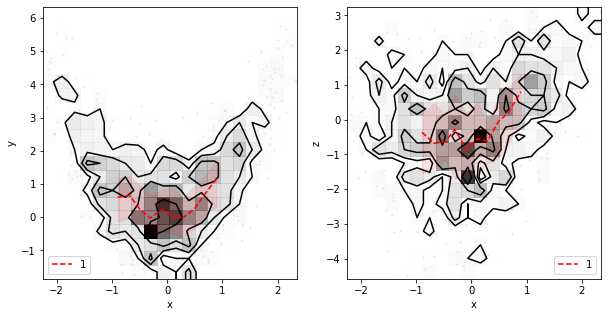

In [44]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
dataset.contour('x', ['y', 'z'], axes=axes)
dataset.trend('x', ['y', 'z'], ranges=([[-1,1],[-10,10]]), axes=axes,
    bins=10,ytype='median',plot_kwargs={"color":"r","ls":"--","label":"1"},\
    scatter_kwargs={"ifscatter":"True","uplim":75,"bottomlim":25,"fkind":"fbetween",\
    "plot_scatter_kwargs":{"color":"r","alpha":0.1}})
axes[0].legend(fontsize=10)

(843,) (843,)
(843,) (843,)


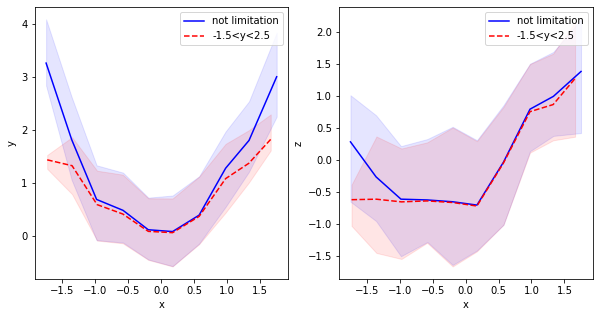

In [104]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

dataset.trend('x', ['y', 'z'], ranges=([[-2,2],[-10,10]]), axes=axes,
    bins=10,ytype='mean',plot_kwargs={"color":"b","ls":"-","label":"not limitation"},\
    scatter_kwargs={"ifscatter":"True","uplim":75,"bottomlim":25,"fkind":"fbetween",\
    "plot_scatter_kwargs":{"color":"b","alpha":0.1}})

dataset.trend('x', ['y', 'z'], ranges=([[-2,2],[-10,10]]), axes=axes,
    bins=10,ytype='mean',plot_kwargs={"color":"r","ls":"--","label":"-1.5<y<2.5"},\
    prop_kwargs={"props":y,"pmin":-100,"pmax":2.5},\
    scatter_kwargs={"ifscatter":"True","uplim":75,"bottomlim":25,"fkind":"fbetween",\
    "plot_scatter_kwargs":{"color":"r","alpha":0.1}})